<H1>Introduction</H1>

This work focuses on exploratory data analysis (EDA) and the development of classification models for predicting obesity. The dataset used in this analysis contains various features related to individuals, such as age, gender, daily eating habits, exercise frequency, and more. The primary objective is to gain insights from the data through EDA and then train multiple classification models to predict obesity based on the available features.

 <H3> Exploratory Data Analysis </H3>
 
The EDA begins with importing the necessary libraries and loading the dataset, which is named "data_Bmi." The dimensions of the dataset are examined, revealing that it consists of 150 rows and 14 columns. The columns represent different variables such as faculty, gender, age, family size, obese status, income, and more.

Statistical information about the dataset is then computed, providing summary statistics for each variable. The presence of null values is checked, and it is determined that no missing values are present. Further analysis includes checking for duplicates and visualizing the distributions of the variables through histograms. Additionally, the correlation between variables is examined using a heatmap, highlighting potential relationships among the features.

In [116]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

A. Let's perform all necessary exploratory data analysis on the data, and divide the data
into an appropriate training and testing set (70% for training)

In [117]:
#importing the dataset
data_Bmi = pd.read_csv("Bmi-Data-1.csv")
data_Bmi.head()

,Level,Faculty,Gender,Age,Family_Size,obese,Income,Daily_Eating,Fruit_Intake,BMI_Aware,SleepingHours,Exercise_Freq,needhelp,Needapp
0,4,2,2,20,6,1,2,2,2,1,3,3,1,1
1,2,1,1,21,9,0,2,2,3,4,3,2,1,2
2,4,1,1,21,6,0,3,2,4,2,2,4,1,1
3,4,1,1,22,3,0,2,3,3,2,3,2,2,1
4,2,2,2,18,4,0,1,1,2,2,2,3,2,2


In [118]:
#checking the dimension of the dataset
data_Bmi.shape

(150, 14)

In [119]:
#checking the columns of the dataset
col = data_Bmi.columns
col

Index(['Level', 'Faculty', 'Gender', 'Age', 'Family_Size', 'obese', 'Income',
       'Daily_Eating', 'Fruit_Intake', 'BMI_Aware', 'SleepingHours',
       'Exercise_Freq', 'needhelp', 'Needapp'],
      dtype='object')

In [120]:
#statistical information about the dataset
data_Bmi.describe()

,Level,Faculty,Gender,Age,Family_Size,obese,Income,Daily_Eating,Fruit_Intake,BMI_Aware,SleepingHours,Exercise_Freq,needhelp,Needapp
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.00000,150.000000,150.000000
mean,3.866667,1.713333,1.506667,25.060000,5.613333,0.166667,2.746667,2.366667,2.346667,1.966667,2.906667,2.36000,1.420000,1.240000
std,1.826967,0.762693,0.501630,9.481335,1.805237,0.373927,0.844935,0.699153,0.785666,1.058153,1.143095,1.07616,0.495212,0.428514
min,1.000000,1.000000,1.000000,16.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,19.000000,4.000000,0.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.00000,1.000000,1.000000
50%,4.000000,2.000000,2.000000,21.000000,5.500000,0.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.00000,1.000000,1.000000
75%,6.000000,2.000000,2.000000,30.000000,7.000000,0.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.00000,2.000000,1.000000
max,6.000000,3.000000,2.000000,59.000000,13.000000,1.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.00000,2.000000,2.000000


In [121]:
#checking for null values
data_Bmi.isna().sum()

Level            0
Faculty          0
Gender           0
Age              0
Family_Size      0
obese            0
Income           0
Daily_Eating     0
Fruit_Intake     0
BMI_Aware        0
SleepingHours    0
Exercise_Freq    0
needhelp         0
Needapp          0
dtype: int64

In [122]:
#general information of the dataset
data_Bmi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Level          150 non-null    int64
 1   Faculty        150 non-null    int64
 2   Gender         150 non-null    int64
 3   Age            150 non-null    int64
 4   Family_Size    150 non-null    int64
 5   obese          150 non-null    int64
 6   Income         150 non-null    int64
 7   Daily_Eating   150 non-null    int64
 8   Fruit_Intake   150 non-null    int64
 9   BMI_Aware      150 non-null    int64
 10  SleepingHours  150 non-null    int64
 11  Exercise_Freq  150 non-null    int64
 12  needhelp       150 non-null    int64
 13  Needapp        150 non-null    int64
dtypes: int64(14)
memory usage: 16.5 KB


In [123]:

#to check for duplicates
data_Bmi.duplicated().sum()

0

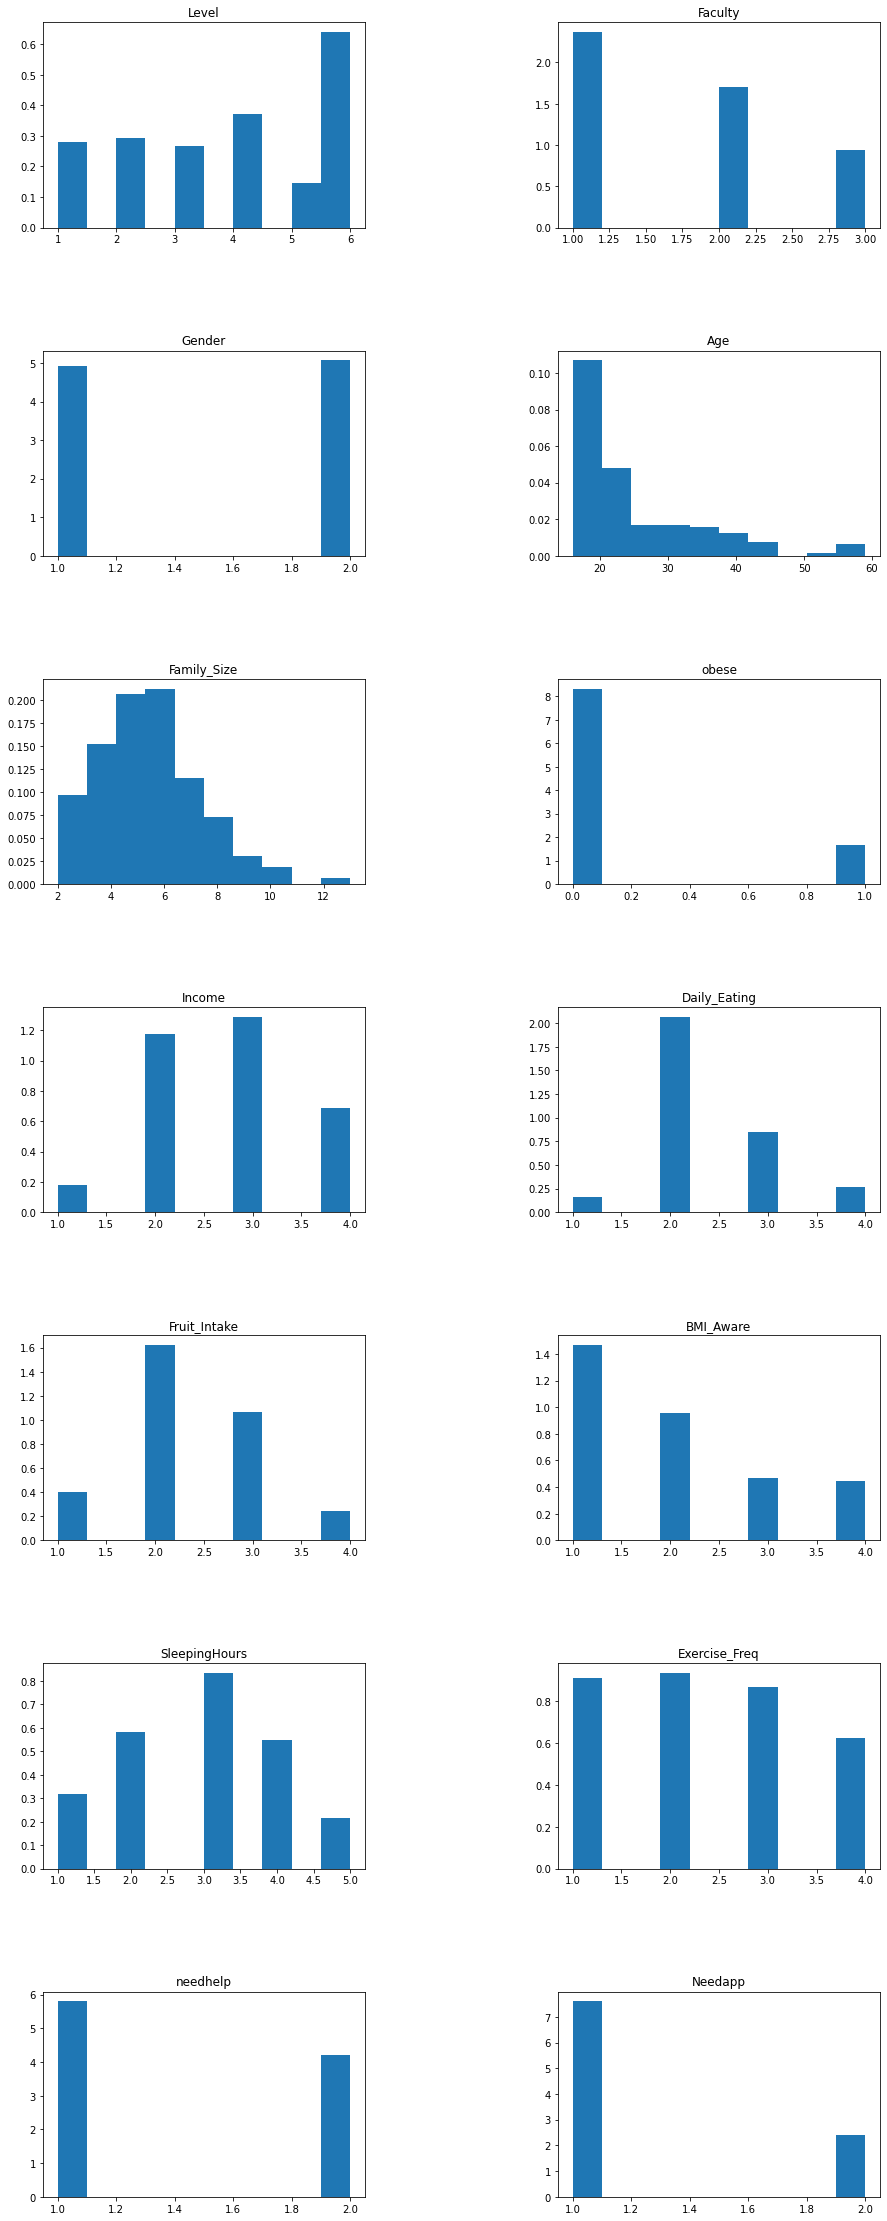

<Figure size 432x288 with 0 Axes>

In [137]:
# Create the figure and subplots
fig, axs = plt.subplots(7, 2, figsize=(15, 40))

# Flatten the axs array to make it easier to iterate through
axs = axs.flatten()

# Loop through each feature and plot a histogram in a separate subplot
for i, col in enumerate(data_Bmi.columns):
    axs[i].hist(data_Bmi[col], density = True, bins=10)
    axs[i].set_title(col)

# Hide any unused subplots
for i in range(len(data_Bmi.columns), 7 * 2):
    axs[i].axis('off')

# Add a main title and adjust the spacing between subplots
#plt.suptitle('Histograms for Multiple Features')
plt.subplots_adjust(hspace=0.6, wspace=0.6)
#fig.suptitle("Histogram for the features", fontsize = 30)

# Show the plot
plt.show()
plt.savefig('LM3.jpg',bbox_inches='tight', dpi=150)

In [125]:
#Value counts for some of the categorical variables
feat = [ "Gender","Faculty","Level"]
for i in feat:
    print("*" * 50)
    print(data_Bmi[i].value_counts().sort_values())

**************************************************
1    74
2    76
Name: Gender, dtype: int64
**************************************************
3    28
2    51
1    71
Name: Faculty, dtype: int64
**************************************************
5    11
3    20
1    21
2    22
4    28
6    48
Name: Level, dtype: int64


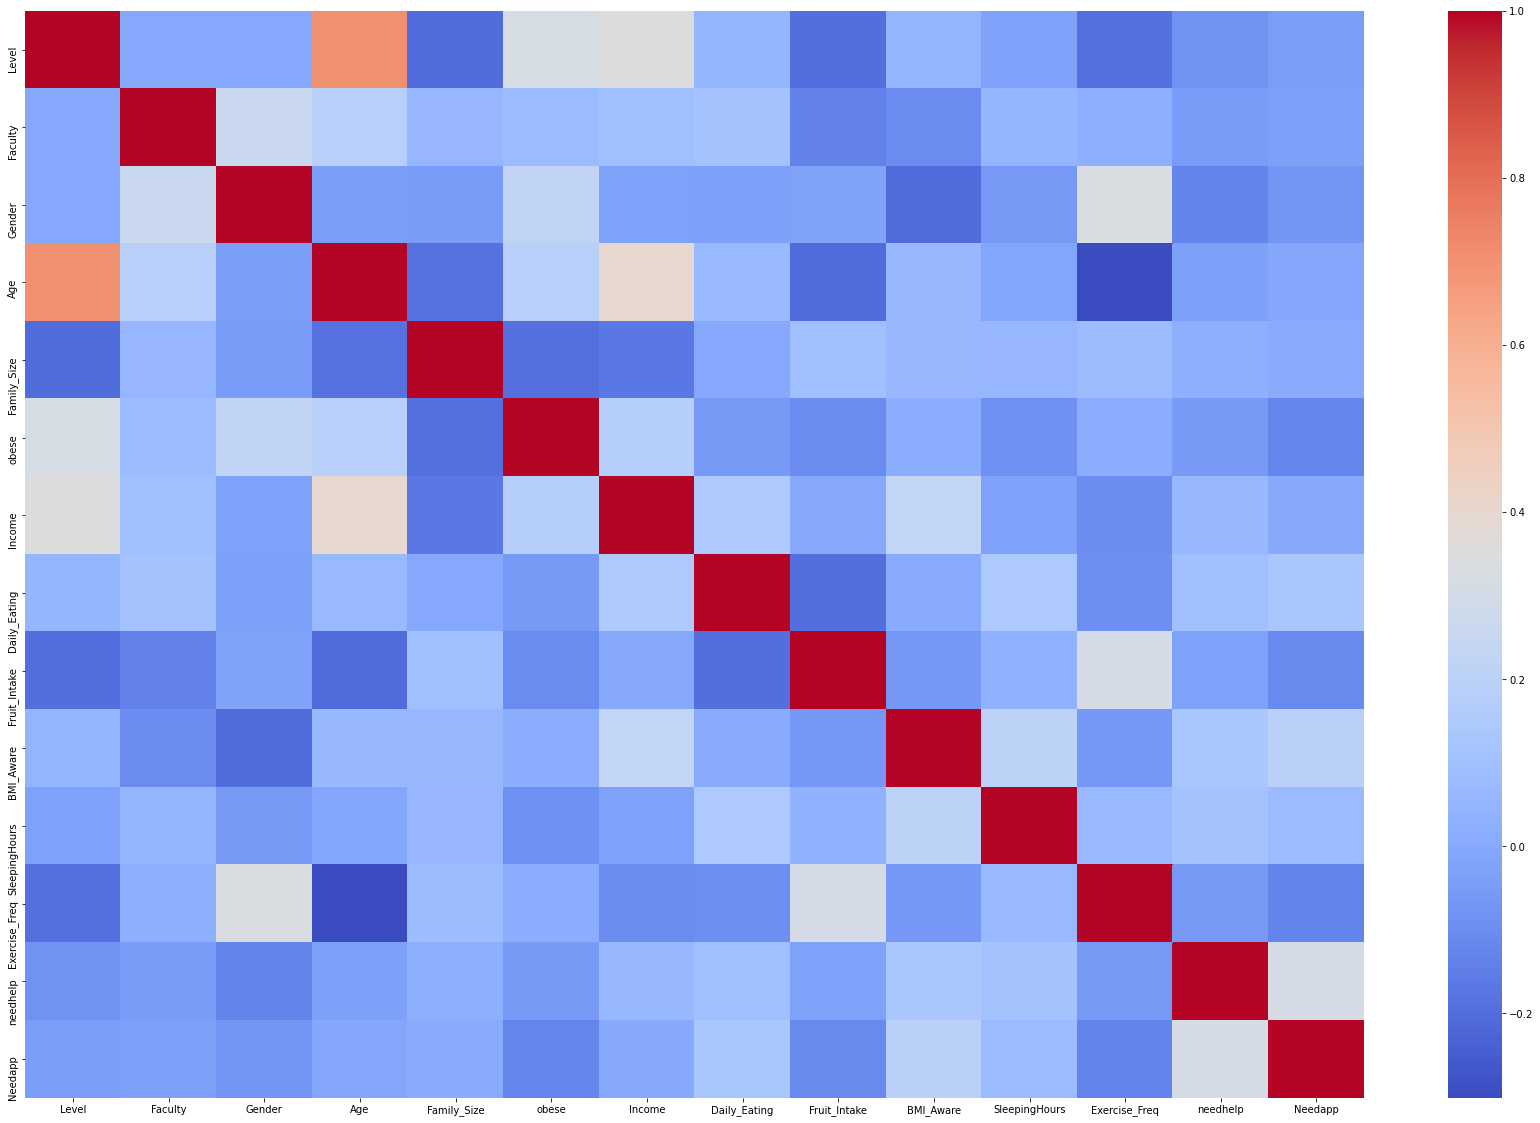

<Figure size 432x288 with 0 Axes>

In [138]:
#Correlation heatmap between the variables
corr = data_Bmi.corr()
plt.figure(figsize=(30, 20))
sns.heatmap(corr, cmap="coolwarm")
plt.show()
plt.savefig('LM4.jpg',bbox_inches='tight', dpi=150)

In [127]:
# Calculate the correlation matrix
corr_matrix = data_Bmi.corr().unstack().sort_values().drop_duplicates()
# Display the correlation matrix
print(corr_matrix)

Exercise_Freq  Age             -0.301412
Fruit_Intake   Age             -0.209131
Gender         BMI_Aware       -0.208203
Level          Family_Size     -0.200915
               Fruit_Intake    -0.196690
                                  ...   
Gender         Exercise_Freq    0.331198
Level          Income           0.351874
Income         Age              0.398172
Age            Level            0.708333
Level          Level            1.000000
Length: 92, dtype: float64


In [128]:
#pip install numpy==1.21.0 scikit-learn==0.24.2 

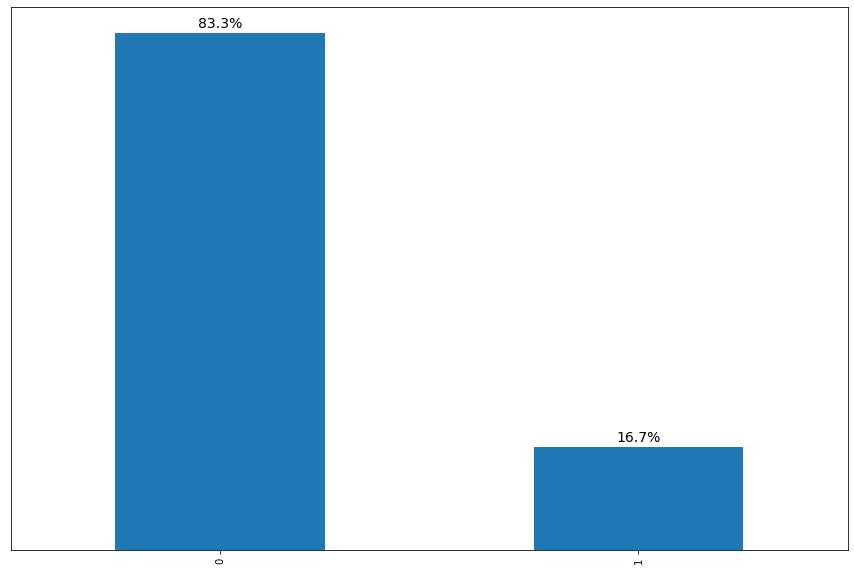

In [139]:
#To check our target variable

import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
ax = data_Bmi["obese"].value_counts(normalize=True).mul(100).plot.bar()
for p in ax.patches:
    y = p.get_height()
    x = p.get_x() + p.get_width() / 2

    # Label of bar height
    label = "{:.1f}%".format(y)

    # Annotate plot
    ax.annotate(label, xy=(x, y), xytext=(0, 5), textcoords="offset points", ha="center", fontsize=14)

# Remove y axis
ax.get_yaxis().set_visible(False)
plt.savefig('LM5.jpg',bbox_inches='tight', dpi=150)

In [17]:
#splitting our dataset into dependent and independent variable
X = data_Bmi.drop(["obese"], axis=1) #independent
y = data_Bmi.obese #dependent

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import StandardScaler
k = 15
#15 folds, 150 for n_estimators im extratrees
# Create the StratifiedKFold object
skf = StratifiedKFold(n_splits=k, shuffle = True, random_state = 42)

# Iterate over each fold
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    
    scaler=StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)


    
<H3>Feature Selection and Model Training</H3>

The next step is feature selection, with a focus on identifying the most important features for predicting obesity. The Boruta algorithm or other suitable feature selection techniques can be applied to determine the relevant variables. However, in this case, the instructions state that all variables should be included in the models due to the small number of features.

B. Perform feature selection using the Boruta algorithm or any appropriate feature
selection algorithm of your choice. (Take “obese” as the target variable.) With the
aid of an appropriate chart, show the most important features that could go into
the final models. (Note: Due to the small number of features in the entire data,
include all variables in your models.).

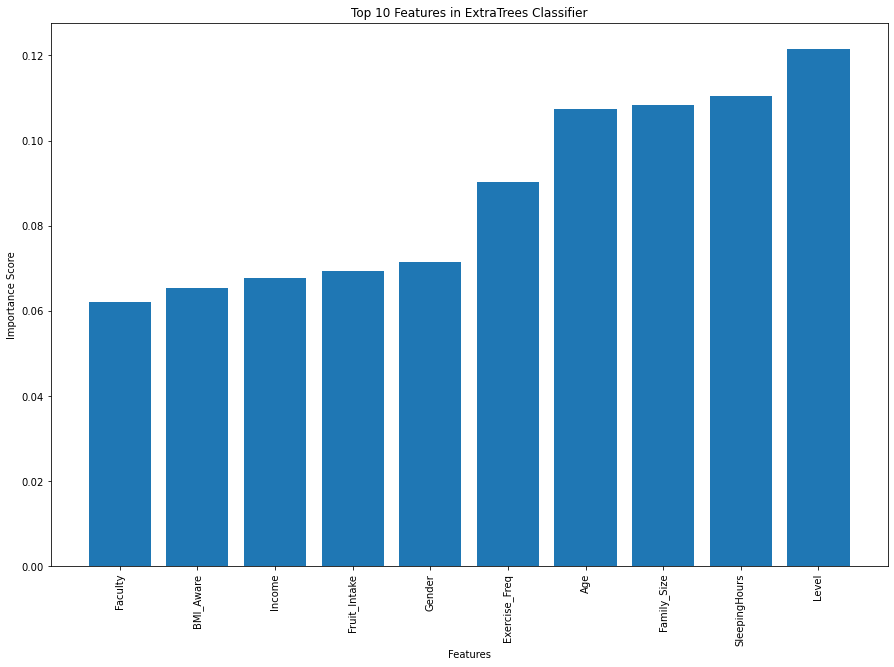

<Figure size 432x288 with 0 Axes>

In [141]:

# Building the model
extra = ExtraTreesClassifier(random_state = 123, n_estimators = 150, criterion = "entropy")
# Training the model
extra.fit(X_train, y_train)

# get feature importance scores from the trained model
importances = extra.feature_importances_

# get the top 10 features with the highest importance scores
indices = np.argsort(importances)[-10:]


col = X.columns.tolist()
#feat_imp = pd.DataFrame(columns = ["Features", "Importance"]) #for i,j in enumerate(importances):
#new_row = {"Features": X.columns, "Importance":importances} #print(f'{col[i]} : {j}'))
#feat_imp = feat_imp.append(new_row, ignore_index=True)
#print(feat_imp)
# plot the feature importance scores in a bar chart
plt.figure(figsize=(15,10))
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), [X.columns[i] for i in indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Top 10 Features in ExtraTrees Classifier")
plt.show()
plt.savefig('LM6.jpg',bbox_inches='tight', dpi=150)

C. Train the following models: Logistic Regression, Linear Vector Quantization
(LVQ), KNN, Random Forest and Linear Discriminant Analysis (LDA)

In [25]:

# C. Model Training
from sklearn.linear_model import LogisticRegression
from sklearn_lvq import GlvqModel
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import ConfusionMatrixDisplay


In [171]:
# Initialize the models
LogisticRegression_model = LogisticRegression()
LinearVector_model = GlvqModel()
KNeighbors_model = KNeighborsClassifier()
RandomForest_model = RandomForestClassifier()
LinearDiscriminant_model = LinearDiscriminantAnalysis()

# Train the models
LogisticRegression_model.fit(X_train, y_train)
LinearVector_model.fit(X_train, y_train)
KNeighbors_model.fit(X_train, y_train)
RandomForest_model.fit(X_train, y_train)
LinearDiscriminant_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

D. For each of the models, compute Accuracy, Balanced Accuracy, Sensitivity,
Specificity, F1-Score, MCC and Precision before and after oversampling.

In [172]:
Store_models = [
    ("Logistic Regression", LogisticRegression()),
    ("LVQ", GlvqModel()),
    ("KNN", KNeighborsClassifier()),
    ( "Random Forest", RandomForestClassifier()),
    ("LDA", LinearDiscriminantAnalysis())]


In [173]:
Store_model_results = pd.DataFrame(columns=["Model", "Accuracy Score"])

In [182]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, recall_score, f1_score, matthews_corrcoef
import pandas as pd
from tqdm import tqdm

# Initialize an empty dataframe to store the results
Store_model_results = pd.DataFrame(columns=["Model", "Accuracy", "Balanced Accuracy", "Sensitivity", "Specificity", "F1-Score", "MCC"])

# Iterate over each classifier and evaluate the model
for clf_name, clf in tqdm(Store_models):
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    
    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, predictions)
    balanced_accuracy = balanced_accuracy_score(y_test, predictions)
    sensitivity = recall_score(y_test, predictions)
    specificity = recall_score(y_test, predictions, pos_label=0)
    f1 = f1_score(y_test, predictions)
    mcc = matthews_corrcoef(y_test, predictions)
    
    # Append the results to the dataframe
    new_row = {"Model": clf_name, "Accuracy": accuracy, "Balanced Accuracy": balanced_accuracy,
               "Sensitivity": sensitivity, "Specificity": specificity, "F1-Score": f1, "MCC": mcc}
    Store_model_results = Store_model_results.append(new_row, ignore_index=True)
    



print("Model Evaluation Results:")
for _, row in Store_model_results.iterrows():
    print(f"Model: {row['Model']}")
    print(f"Accuracy: {row['Accuracy']}")
    print(f"Balanced Accuracy: {row['Balanced Accuracy']}")
    print(f"Sensitivity: {row['Sensitivity']}")
    print(f"Specificity: {row['Specificity']}")
    print(f"F1-Score: {row['F1-Score']}")
    print(f"MCC: {row['MCC']}")
    print()

100%|██████████| 5/5 [00:00<00:00, 14.67it/s]

Model Evaluation Results:
Model: Logistic Regression
Accuracy: 0.8
Balanced Accuracy: 0.56
Sensitivity: 0.2
Specificity: 0.92
F1-Score: 0.25
MCC: 0.14907119849998599

Model: LVQ
Accuracy: 0.8333333333333334
Balanced Accuracy: 0.5
Sensitivity: 0.0
Specificity: 1.0
F1-Score: 0.0
MCC: 0.0

Model: KNN
Accuracy: 0.7666666666666667
Balanced Accuracy: 0.46
Sensitivity: 0.0
Specificity: 0.92
F1-Score: 0.0
MCC: -0.11952286093343936

Model: Random Forest
Accuracy: 0.8333333333333334
Balanced Accuracy: 0.5
Sensitivity: 0.0
Specificity: 1.0
F1-Score: 0.0
MCC: 0.0

Model: LDA
Accuracy: 0.8333333333333334
Balanced Accuracy: 0.58
Sensitivity: 0.2
Specificity: 0.96
F1-Score: 0.28571428571428575
MCC: 0.23904572186687872



In [183]:
Store_model_results_original=Store_model_results.sort_values(by="MCC", ascending=False)
Store_model_results_original

,Model,Accuracy,Balanced Accuracy,Sensitivity,Specificity,F1-Score,MCC
4,LDA,0.833333,0.58,0.2,0.96,0.285714,0.239046
0,Logistic Regression,0.800000,0.56,0.2,0.92,0.250000,0.149071
1,LVQ,0.833333,0.50,0.0,1.00,0.000000,0.000000
3,Random Forest,0.833333,0.50,0.0,1.00,0.000000,0.000000
2,KNN,0.766667,0.46,0.0,0.92,0.000000,-0.119523


In [184]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, recall_score, f1_score, matthews_corrcoef
import pandas as pd
from tqdm import tqdm

# Initialize an empty dataframe to store the results
Store_model_results = pd.DataFrame(columns=["Model", "Accuracy", "Balanced Accuracy", "Sensitivity", "Specificity", "F1-Score", "MCC"])

# Iterate over each classifier and evaluate the model
for clf_name, clf in tqdm(Store_models):
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    
    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, predictions)
    balanced_accuracy = balanced_accuracy_score(y_test, predictions)
    sensitivity = recall_score(y_test, predictions)
    specificity = recall_score(y_test, predictions, pos_label=0)
    f1 = f1_score(y_test, predictions)
    mcc = matthews_corrcoef(y_test, predictions)
    
    # Append the results to the dataframe
    new_row = {"Model": clf_name, "Accuracy": accuracy, "Balanced Accuracy": balanced_accuracy,
               "Sensitivity": sensitivity, "Specificity": specificity, "F1-Score": f1, "MCC": mcc}
    Store_model_results = Store_model_results.append(new_row, ignore_index=True)

# Print the results
print("Model Evaluation Results:")
for _, row in Store_model_results.iterrows():
    print(f"Model: {row['Model']}")
    print(f"Accuracy: {row['Accuracy']}")
    print(f"Balanced Accuracy: {row['Balanced Accuracy']}")
    print(f"Sensitivity: {row['Sensitivity']}")
    print(f"Specificity: {row['Specificity']}")
    print(f"F1-Score: {row['F1-Score']}")
    print(f"MCC: {row['MCC']}")
    print()

100%|██████████| 5/5 [00:00<00:00, 19.40it/s]

Model Evaluation Results:
Model: Logistic Regression
Accuracy: 0.8
Balanced Accuracy: 0.56
Sensitivity: 0.2
Specificity: 0.92
F1-Score: 0.25
MCC: 0.14907119849998599

Model: LVQ
Accuracy: 0.8333333333333334
Balanced Accuracy: 0.5
Sensitivity: 0.0
Specificity: 1.0
F1-Score: 0.0
MCC: 0.0

Model: KNN
Accuracy: 0.7666666666666667
Balanced Accuracy: 0.46
Sensitivity: 0.0
Specificity: 0.92
F1-Score: 0.0
MCC: -0.11952286093343936

Model: Random Forest
Accuracy: 0.8333333333333334
Balanced Accuracy: 0.5
Sensitivity: 0.0
Specificity: 1.0
F1-Score: 0.0
MCC: 0.0

Model: LDA
Accuracy: 0.8333333333333334
Balanced Accuracy: 0.58
Sensitivity: 0.2
Specificity: 0.96
F1-Score: 0.28571428571428575
MCC: 0.23904572186687872



In [179]:
Store_model_results_Over=Store_model_results.sort_values(by="MCC", ascending=False)
Store_model_results_Over

,Model,Accuracy,Balanced Accuracy,Sensitivity,Specificity,F1-Score,MCC
4,LDA,0.833333,0.58,0.2,0.96,0.285714,0.239046
0,Logistic Regression,0.800000,0.56,0.2,0.92,0.250000,0.149071
1,LVQ,0.833333,0.50,0.0,1.00,0.000000,0.000000
3,Random Forest,0.833333,0.50,0.0,1.00,0.000000,0.000000
2,KNN,0.766667,0.46,0.0,0.92,0.000000,-0.119523


E. Interpret the fourfold plots of the confusion matrices of the models. Also, obtain
the ROC and AUC scores of each model.

In [105]:
#Fitting and evaluating the models
#Importing necessary libraries for Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from tqdm import tqdm
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, ConfusionMatrixDisplay
from sklearn.metrics import matthews_corrcoef

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


Confusion Matrix for Logistic Regression:
[[23  2]
 [ 4  1]]

Confusion Matrix for LVQ:
[[25  0]
 [ 5  0]]

Confusion Matrix for KNN:
[[23  2]
 [ 5  0]]

Confusion Matrix for Random Forest:
[[25  0]
 [ 5  0]]

Confusion Matrix for LDA:
[[24  1]
 [ 4  1]]



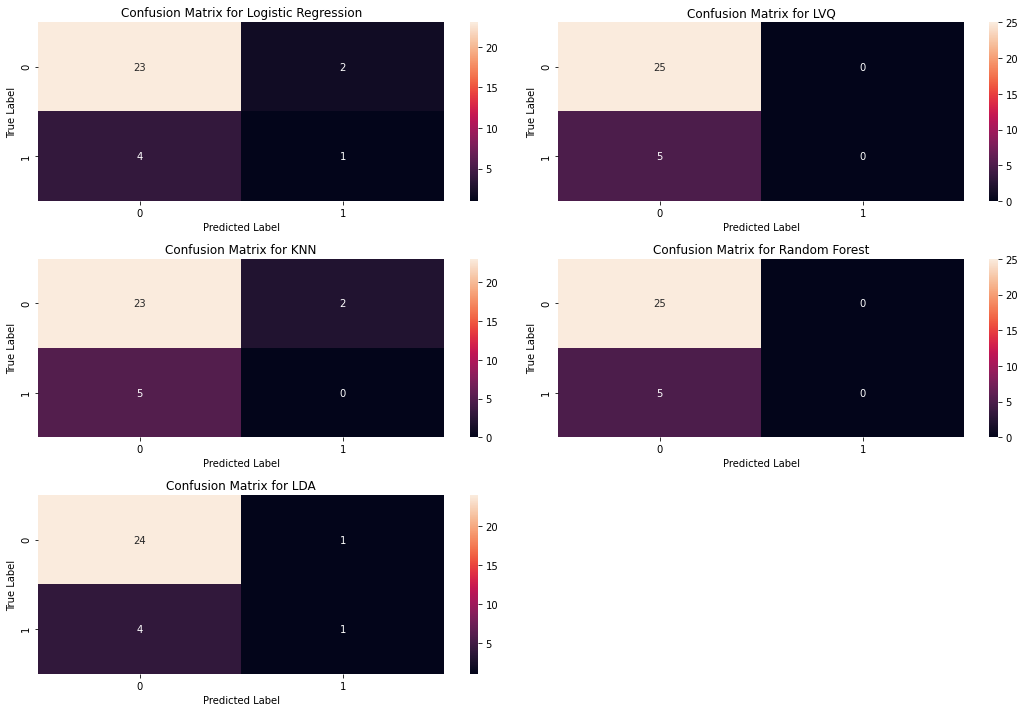

In [162]:
# Define the models (replace with your chosen models)
Store_models = [
    ("Logistic Regression", LogisticRegression()),
    ("LVQ", GlvqModel()),
    ("KNN", KNeighborsClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("LDA", LinearDiscriminantAnalysis())
]

# Create a subplot to display multiple confusion matrices
num_models = len(Store_models)
num_cols = 2  # Number of columns in the subplot grid
num_rows = (num_models + 1) // num_cols  # Number of rows in the subplot grid

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

for i, (model_name, model) in enumerate(Store_models):
    row = i // num_cols
    col = i % num_cols

    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    cm = confusion_matrix(y_test, predictions)

    ax = axes[row, col] if num_rows > 1 else axes[col]
    sns.heatmap(cm, annot=True, ax=ax)
    ax.set_title(f"Confusion Matrix for {model_name}")
    ax.set_ylabel("True Label")
    ax.set_xlabel("Predicted Label")

    # Print the confusion matrix for each model
    print(f"Confusion Matrix for {model_name}:")
    print(cm)
    print()

# Remove empty subplots if the number of models is not a perfect square
if num_models % num_cols != 0:
    for i in range(num_models, num_rows * num_cols):
        row = i // num_cols
        col = i % num_cols
        fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

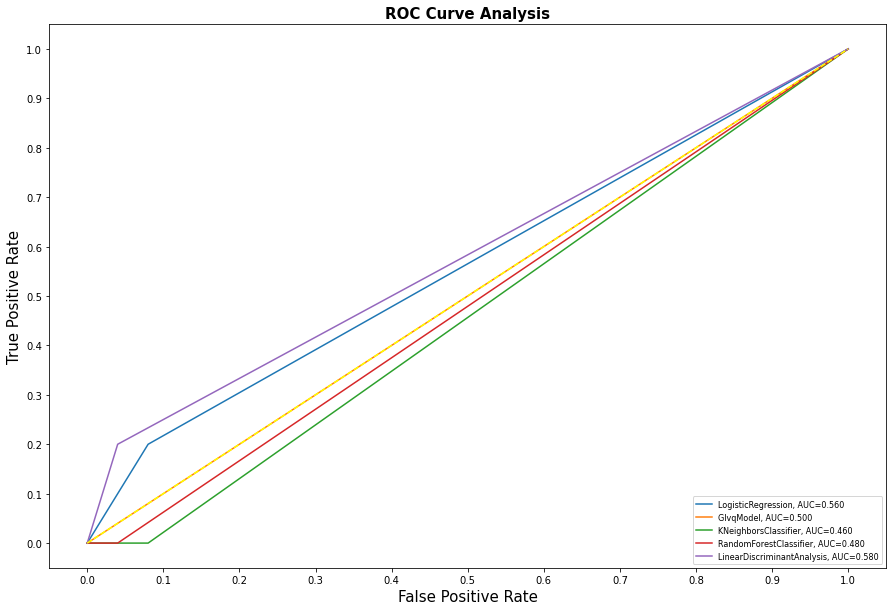

                                         fpr              tpr   auc
classifiers                                                        
LogisticRegression          [0.0, 0.08, 1.0]  [0.0, 0.2, 1.0]  0.56
GlvqModel                         [0.0, 1.0]       [0.0, 1.0]  0.50
KNeighborsClassifier        [0.0, 0.08, 1.0]  [0.0, 0.0, 1.0]  0.46
RandomForestClassifier      [0.0, 0.04, 1.0]  [0.0, 0.0, 1.0]  0.48
LinearDiscriminantAnalysis  [0.0, 0.04, 1.0]  [0.0, 0.2, 1.0]  0.58


In [164]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define the models
Store_models = [
    LogisticRegression(),
    GlvqModel(),
    KNeighborsClassifier(),
    RandomForestClassifier(),
    LinearDiscriminantAnalysis()
]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr', 'tpr', 'auc'])

# Train the models and record the results
for cls in Store_models:
    model = cls.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    
    result_table = result_table.append({'classifiers': cls.__class__.__name__,
                                        'fpr': fpr,
                                        'tpr': tpr,
                                        'auc': auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

fig = plt.figure(figsize=(15, 10))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], result_table.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0, 1], [0, 1], color='yellow', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size': 8}, loc='lower right')

plt.show()

# Print the result table
print(result_table)

# Oversampling

Confusion Matrix for Logistic Regression:
[[19  6]
 [ 0  5]]

Confusion Matrix for LVQ:
[[17  8]
 [ 2  3]]

Confusion Matrix for KNN:
[[11 14]
 [ 2  3]]

Confusion Matrix for Random Forest:
[[22  3]
 [ 5  0]]

Confusion Matrix for LDA:
[[19  6]
 [ 0  5]]



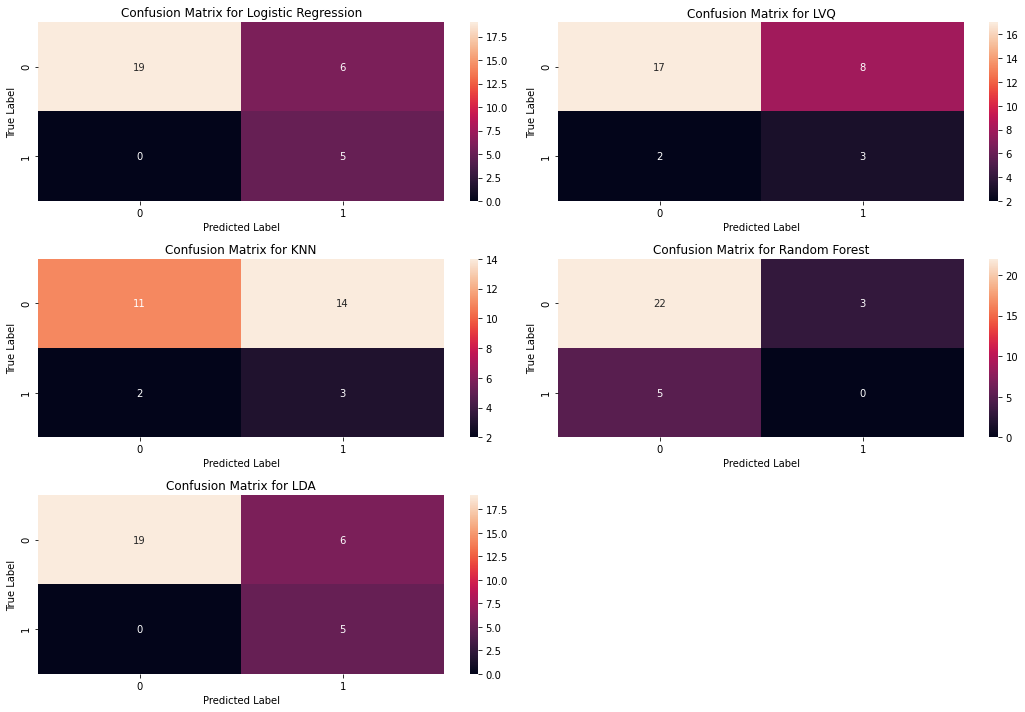

In [163]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define the models (replace with your chosen models)
Store_models = [
    ("Logistic Regression", LogisticRegression()),
    ("LVQ", GlvqModel()),
    ("KNN", KNeighborsClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("LDA", LinearDiscriminantAnalysis())
]

# Create a subplot to display multiple confusion matrices
num_models = len(Store_models)
num_cols = 2  # Number of columns in the subplot grid
num_rows = (num_models + 1) // num_cols  # Number of rows in the subplot grid

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

for i, (model_name, model) in enumerate(Store_models):
    row = i // num_cols
    col = i % num_cols

    model.fit(X_train_Over_resampled, y_train_Over_resampled)
    predictions = model.predict(X_test)
    cm = confusion_matrix(y_test, predictions)

    ax = axes[row, col] if num_rows > 1 else axes[col]
    sns.heatmap(cm, annot=True, ax=ax)
    ax.set_title(f"Confusion Matrix for {model_name}")
    ax.set_ylabel("True Label")
    ax.set_xlabel("Predicted Label")

    # Print the confusion matrix
    print(f"Confusion Matrix for {model_name}:")
    print(cm)
    print()

# Remove empty subplots if the number of models is not a perfect square
if num_models % num_cols != 0:
    for i in range(num_models, num_rows * num_cols):
        row = i // num_cols
        col = i % num_cols
        fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

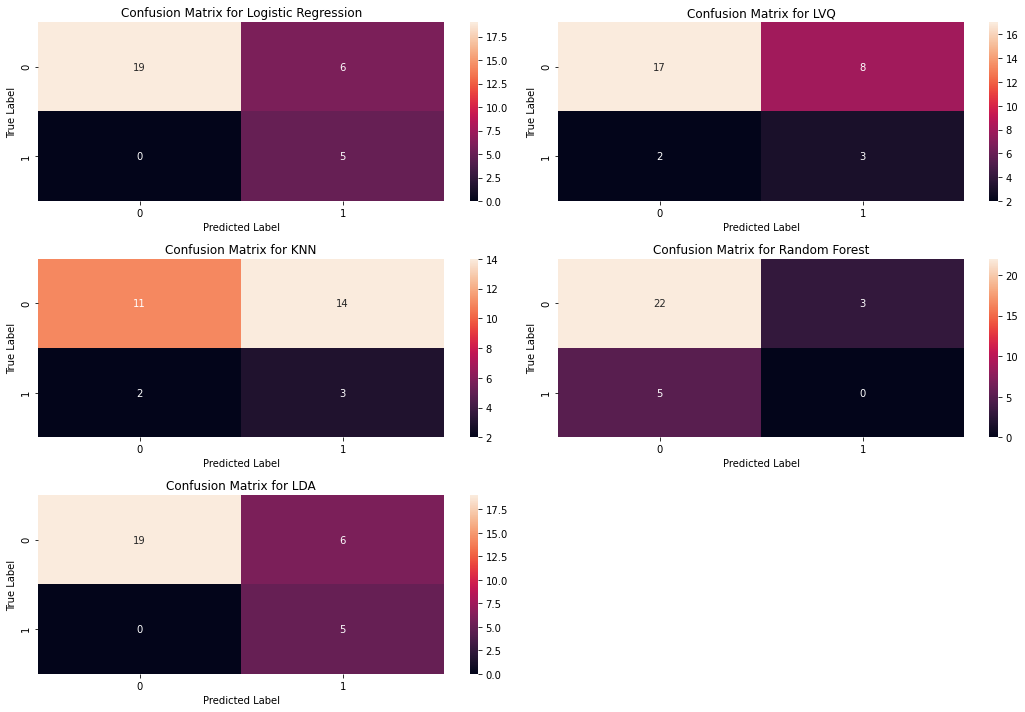

In [112]:
# Define the models (replace with your chosen models)
Store_models = [
    ("Logistic Regression", LogisticRegression()),
    ("LVQ", GlvqModel()),
    ("KNN", KNeighborsClassifier()),
    ( "Random Forest", RandomForestClassifier()),
    ("LDA", LinearDiscriminantAnalysis())]

# Create a subplot to display multiple confusion matrices
num_models = len(Store_models)
num_cols = 2  # Number of columns in the subplot grid
num_rows = (num_models + 1) // num_cols  # Number of rows in the subplot grid

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

for i, (model_name, model) in enumerate(Store_models):
    row = i // num_cols
    col = i % num_cols

    model.fit(X_train_Over_resampled, y_train_Over_resampled)
    predictions = model.predict(X_test)
    cm = confusion_matrix(y_test, predictions)

    ax = axes[row, col] if num_rows > 1 else axes[col]
    sns.heatmap(cm, annot=True, ax=ax)
    ax.set_title(f"Confusion Matrix for {model_name}")
    ax.set_ylabel("True Label")
    ax.set_xlabel("Predicted Label")

# Remove empty subplots if the number of models is not a perfect square
if num_models % num_cols != 0:
    for i in range(num_models, num_rows * num_cols):
        row = i // num_cols
        col = i % num_cols
        fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

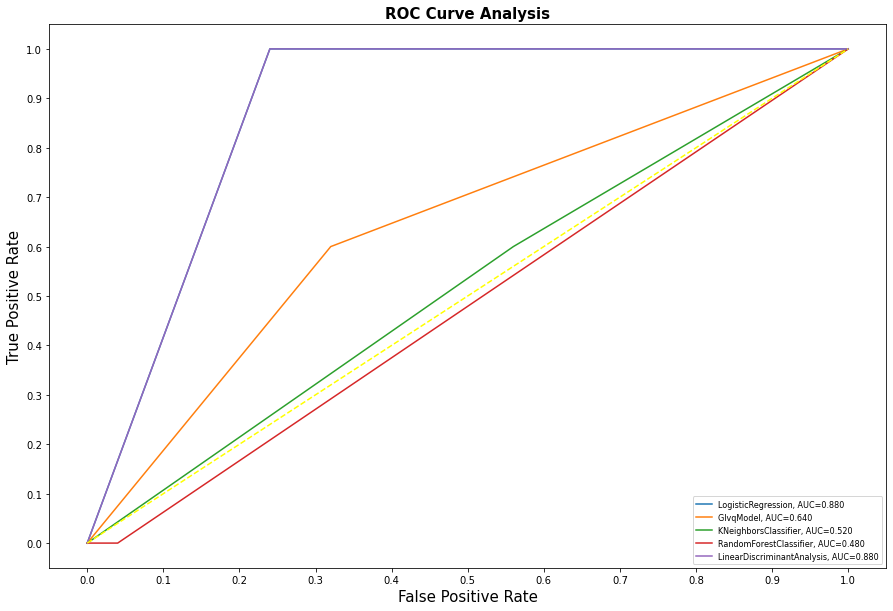

                                         fpr              tpr   auc
classifiers                                                        
LogisticRegression          [0.0, 0.24, 1.0]  [0.0, 1.0, 1.0]  0.88
GlvqModel                   [0.0, 0.32, 1.0]  [0.0, 0.6, 1.0]  0.64
KNeighborsClassifier        [0.0, 0.56, 1.0]  [0.0, 0.6, 1.0]  0.52
RandomForestClassifier      [0.0, 0.04, 1.0]  [0.0, 0.0, 1.0]  0.48
LinearDiscriminantAnalysis  [0.0, 0.24, 1.0]  [0.0, 1.0, 1.0]  0.88


In [165]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define the models
Store_models = [
    LogisticRegression(),
    GlvqModel(),
    KNeighborsClassifier(),
    RandomForestClassifier(),
    LinearDiscriminantAnalysis()
]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr', 'tpr', 'auc'])

# Train the models and record the results
for cls in Store_models:
    model = cls.fit(X_train_Over_resampled, y_train_Over_resampled)
    y_pred = model.predict(X_test)
    
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    
    result_table = result_table.append({'classifiers': cls.__class__.__name__,
                                        'fpr': fpr,
                                        'tpr': tpr,
                                        'auc': auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

fig = plt.figure(figsize=(15, 10))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], result_table.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0, 1], [0, 1], color='yellow', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size': 8}, loc='lower right')

plt.show()

# Print the result table
print(result_table)

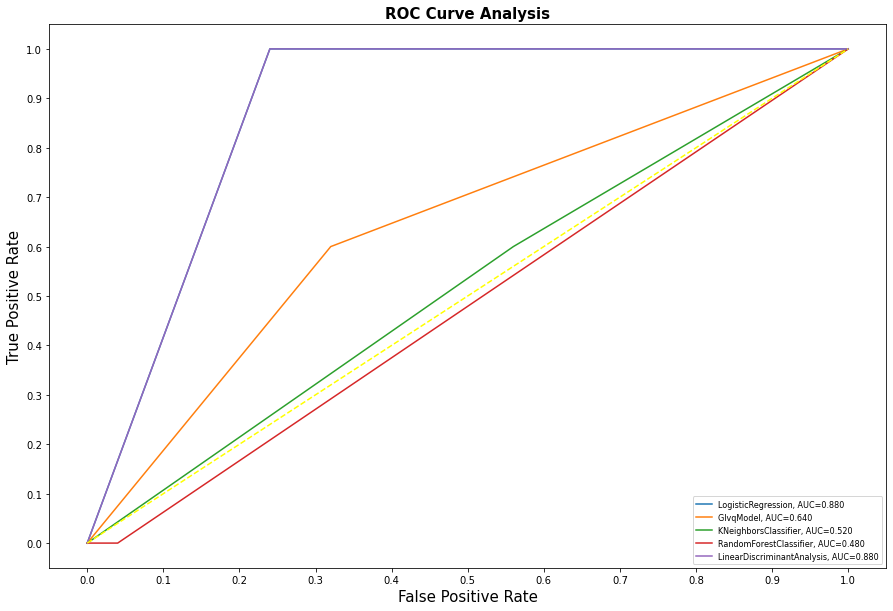

In [113]:
Store_models = [
    LogisticRegression(),GlvqModel(),KNeighborsClassifier(),RandomForestClassifier(), LinearDiscriminantAnalysis()]


# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in Store_models:
    model = cls.fit(X_train_Over_resampled, y_train_Over_resampled)
    #yproba = model.predict_proba(X_test)[::,1]
    y_pred = model.predict(X_test)
    
    fpr, tpr, _ = roc_curve(y_test,  y_pred)
    auc = roc_auc_score(y_test, y_pred)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)


fig = plt.figure(figsize=(15, 10))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], result_table.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='yellow', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':8}, loc='lower right')

plt.show()

F. Create a single Latex table to summarize your results in (d) above and also show
your inference results on variable importance according to the judgement of each
classification model.

In [111]:
import pandas as pd

# Assume you have three DataFrames: df1, df2, and df3

# Concatenate the DataFrames vertically
concatenated_df = pd.concat([Store_model_results_original, Store_model_results_Over], axis=0)

# Reset the index of the concatenated DataFrame
concatenated_df = concatenated_df.reset_index(drop=True)
concatenated_df

,Model,Accuracy,Balanced Accuracy,Sensitivity,Specificity,F1-Score,MCC
0,LDA,0.833333,0.58,0.2,0.96,0.285714,0.239046
1,Logistic Regression,0.800000,0.56,0.2,0.92,0.250000,0.149071
2,LVQ,0.833333,0.50,0.0,1.00,0.000000,0.000000
3,Random Forest,0.833333,0.50,0.0,1.00,0.000000,0.000000
4,KNN,0.766667,0.46,0.0,0.92,0.000000,-0.119523
5,Logistic Regression,0.800000,0.88,1.0,0.76,0.625000,0.587754
6,LDA,0.800000,0.88,1.0,0.76,0.625000,0.587754
7,LVQ,0.666667,0.64,0.6,0.68,0.375000,0.216541
8,KNN,0.466667,0.52,0.6,0.44,0.272727,0.030083
9,Random Forest,0.733333,0.44,0.0,0.88,0.000000,-0.149071


G. Write a comprehensive report on the results you obtained A-F above. This should
illustrate your data story telling communication ability based on the data and its
description. Present your work in a professional way, like a mini-project. Feel free
to include any introduction, literature, discussions, and recommendations with
recent references on the subject matter.

<H2>Conclusion</H2>

In conclusion, this work presents an exploratory data analysis and classification modeling approach for predicting obesity. The analysis begins with data exploration and visualization to gain insights into the dataset. Important features are identified through feature selection techniques, although all variables are ultimately used due to the dataset's small size. 

Finally, multiple classification models are trained to predict obesity, providing different options for predicting this health condition based on the available features. These models can be evaluated and compared based on their performance metrics, such as accuracy, precision, recall, and F1-score, to determine the most effective model for obesity prediction.